In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../weather-challenge/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


656

In [10]:
#Weather Map URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

#create spaces to insert lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#start at 1 
record = 1

print('------------------------------')
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#loop through cities 
for city in cities:  
    
    #try/except so when there isn't data in a call it will give print and not error
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of {len(cities)}. | {city_record}")
 
        
        # Increase counter by one 
        record= record + 1
    except:
        print("City not found. Skipping...")
        record= record + 1
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

------------------------------
Beginning Data Retrieval
-------------------------------
Processing Record 1 of 656. | Busselton
Processing Record 2 of 656. | Cockburn Town
Processing Record 3 of 656. | Ekhabi
Processing Record 4 of 656. | Santa Maria
Processing Record 5 of 656. | Anadyr
Processing Record 6 of 656. | Tiksi
Processing Record 7 of 656. | Merauke
Processing Record 8 of 656. | Rikitea
Processing Record 9 of 656. | Vila Velha
Processing Record 10 of 656. | Datong
Processing Record 11 of 656. | Jamestown
Processing Record 12 of 656. | Atuona
Processing Record 13 of 656. | Prince Albert
Processing Record 14 of 656. | Avarua
Processing Record 15 of 656. | Saskylakh
Processing Record 16 of 656. | Mataura
Processing Record 17 of 656. | Nieuw Amsterdam
Processing Record 18 of 656. | Waiouru
Processing Record 19 of 656. | Cape Town
Processing Record 20 of 656. | Khatanga
Processing Record 21 of 656. | Carnarvon
Processing Record 22 of 656. | Votice
Processing Record 23 of 656. | Pu

In [11]:
#create dictionary
weather_data = {"City": city_name,"Cloudiness":cloudiness, "Country":country,"Date":date, "Humidity": humidity,"Lat":lat, 
                "Lng":lng, "Max Temp": max_temp,"Wind Speed":wind_speed}
#create dataframe
weather_df = pd.DataFrame(weather_data)

weather_df.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

In [27]:
weather_df.head()
weather_df.to_csv(output_data_file)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,95,AU,1571178046,67,-33.64,115.35,45.00,6.55
1,Cockburn Town,40,TC,1571178047,70,21.46,-71.14,84.20,4.70
2,Ekhabi,60,RU,1571178047,82,53.51,142.97,31.93,6.40
3,Santa Maria,34,BR,1571178047,22,-16.02,-48.01,86.00,9.17
4,Anadyr,40,RU,1571178047,96,64.73,177.51,37.40,29.08


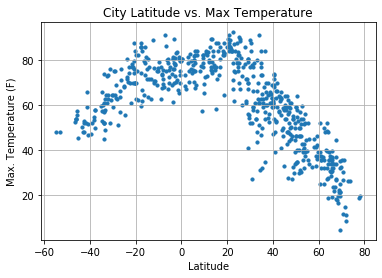

In [23]:
#scatterplot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

#scatter labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Max Temperature.png")

plt.show()

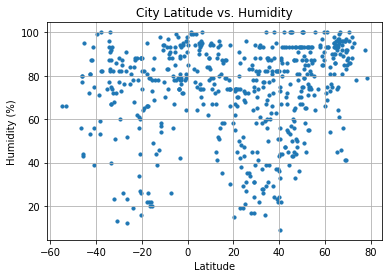

In [24]:
#scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

#scatter labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Humidity.png")

plt.show()

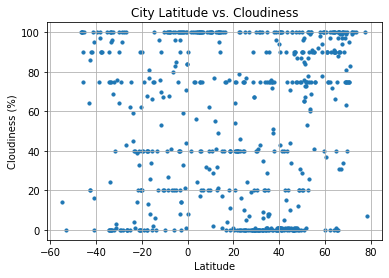

In [25]:
#scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

#scatter labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Cloudiness.png")

plt.show()

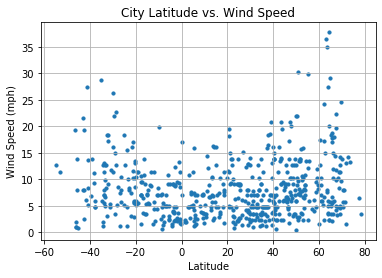

In [26]:
#scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

#scatter labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Wind Speed.png")

plt.show()